<a href="https://colab.research.google.com/github/usmarcv/ai-notes/blob/main/mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Codando o Multilayer Perceptron 
## Algoritmo 

*   Inicializa os pesos com valores aleatórios
*   Baseado nos dados (aprendizagem supervisionada), realiza os cálculos com pesos e calcula o erro
* Calcula as mundanças nos pesos e os atualiza (backprop)
* O algoritmo termina quando o erro é pequeno (momentum)



In [ ]:
import numpy as np #Utilizado para realização de operações numéricas
import pandas as pd #Utilizado para vriar os dataframes para mostrar os gráficos (Heatmap)
import matplotlib.pyplot as plt #Utilizado para visualizar os gráficos (Heatmap)
import seaborn as sns #Utilizado para visualizar os gráficos (Heatmap)
import math #Utilizado para calcular o log2()

In [ ]:
#Tentando implementar uma MLP

#Função sigmoide
def sigmoid(soma):
  return 1/(1+np.exp(-soma))

#Função sigmoide derivada para o gradiente
def sigmoidDerivada(sig):
   return sig * (1 - sig)



entradas = np.array([ [0,0], [0,1], [1, 0], [1,1] ])
saidas = np.array([ [0], [1], [1], [0] ])
#pesos0 = np.array([ [-0.424, -0.740, -0.961], [0.358, -0.577, -0.469] ])
#pesos1 = np.array([ [-0.017], [-0.893], [0.148] ])

#Gerando pesos aleatoriamente
pesos0 = 2 * np.random.random((2,3)) - 1 #Multiplicando por 2 eu posso mesclar os valores em -n ... n
pesos1 = 2 * np.random.random((3,1)) - 1

epocas = 10000
momento = 1
taxaAprendizagem = 0.6

for j in range(epocas): 

  #Calculo para a primeira camada
  camadaEntrada = entradas
  somaSinapse0 = np.dot(camadaEntrada, pesos0)
  # ---
  
  #Calculo para camada oculta ---
  camadaOculta = sigmoid(somaSinapse0)    
  somaSinapse1 = np.dot(camadaOculta, pesos1)
  camadaSaida = sigmoid(somaSinapse1)
  # ---
  
  #Calculando o erro, com a rede de 51% com os valores declarados acima ---
  erroCamadaSaida = saidas - camadaSaida
  mediaAbsoluta = np.mean(np.abs(erroCamadaSaida))
  print("Erro: " + str(mediaAbsoluta)) 
  #---

  derivadaSaida = sigmoidDerivada(camadaSaida)
  deltaSaida = erroCamadaSaida * derivadaSaida

  pesos1Transposta = pesos1.T
  deltaSaidaXPeso = deltaSaida.dot(pesos1Transposta)
  deltaCamadaOculta = deltaSaidaXPeso * sigmoidDerivada(camadaOculta)

  #Atualiza os pesos com backprop
  camadaOcultaTransposta = camadaOculta.T
  pesosNovo1 = camadaOcultaTransposta.dot(deltaSaida)
  pesos1 = (pesos1 * momento) + (pesosNovo1 * taxaAprendizagem) 

  camadaOcultaTransposta = camadaOculta.T
  pesosNovo1 = camadaOcultaTransposta.dot(deltaSaida)
  pesos1 = (pesos1 * momento) + (pesosNovo1 * taxaAprendizagem) 

  camadaEntradaTransposta = camadaEntrada.T
  pesosNovo0 = camadaEntradaTransposta.dot(deltaCamadaOculta)
  pesos0 = (pesos0 * momento) + (pesosNovo0 * taxaAprendizagem)


#Melhorando o código e implementando o Multilayer Perceptron

In [ ]:
class Backprop:
    def __init__(self, entradas, saidas, neuronios = 3, taxaAprendizagem = 0.05, epocas = 100000, momento = 1):
        '''
        Argumentos:

        entradas -> Entradas possiveis
        saidas -> Saidas esperadas de acordo com a porta lógica das possiveis entradas
        neuronios -> Numero de neuronios na camada escondida
        taxaAprendizagem -> Expressa a velocidade de convergenvia do algoritmo
        epocas -> Numero de iteracoes para o treinamento
        momento -> Momentum do algoritmo, tenta evitar os minimos locais
        '''
        self.entradas = entradas
        self.saidas = saidas
        self.neuronios = neuronios
        self.taxaAprendizagem = taxaAprendizagem
        self.epocas = epocas
        self.momento = momento
        self.pesos0 = 0.0
        self.pesos1 = 0.0
        self.camadaSaida = []
        self.mediaAbsoluta = 0.0
        self.erro = []

    '''
    Calcular o valor da funcao sigomoide (shape 'S') para o somatorio ja calculado
    A funcao sigmoide retorna um valor real entre 0 e 1
    '''
    def sigmoid(self, soma):
        return 1/(1+np.exp(-soma))

    '''
    Calcula a derivada - Direciona o grandiente para qual lado do gradiente e necessario atualizar os pesos
    '''
    def sigmoidDerivada(self, sig):
       return sig * (1-sig)
      
    '''
    Gera os pesos aleatoriamente
    '''
    def inicializaPesos(self):
        Nin = len(self.entradas[0])
        Nhidden = self.neuronios
        Nout = len(self.saidas[0])
        #Entrada * Camada escondida
        self.pesos0 = 2 * np.random.random((Nin,Nhidden)) - 1
        #Camada escondida * Saida
        self.pesos1 = 2 * np.random.random((Nhidden,Nout)) - 1
        print("Arquitetura da rede:\nEntrada: ", Nin, ", Camada escondida: ", Nhidden, ", Saida: ", Nout)

    '''
    Treinamento da rede
    '''
    def treinamento(self):
       for j in range(self.epocas):
          '''
          Calcula o somatorio inicial (entrada * pesos) e obtem o valor da funcao de ativacao.
          '''
          camadaEntrada = self.entradas #Copia a entrada para a variavel camadaEntrada
          somaSinapse0 = np.dot(camadaEntrada, self.pesos0) #Faz a primeira etapa, a multiplicacao e soma de entradas pelos pesos
          camadaOculta = self.sigmoid(somaSinapse0) #Com os valores do somatorio obtem-se o valor correspondente da funcao de ativacao sigmoide
          '''
           Calcula o somatorio posterior (camada escondinda * pesos) e obtem o valor da funcao de ativacao
          '''
          somaSinapse1 = np.dot(camadaOculta, self.pesos1) #Faz a segunda etapa, a multiplicacao e soma das entradas pelos pesos
          self.camadaSaida = self.sigmoid(somaSinapse1)
          '''
          Calcula o erro (saida esperada - saida da rede) e a media absoluta dos erros
          '''
          erroCamadaSaida = self.saidas - self.camadaSaida #Calcula os erros
          self.mediaAbsoluta = np.mean(np.abs(erroCamadaSaida)) #Calcula a media dos erros
          self.erro.append(self.mediaAbsoluta) #Armazena os erros em uma lista de erros
          '''
          Realiza os calculos da derivada e do delta de saida
          '''
          derivadaSaida = self.sigmoidDerivada(self.camadaSaida)
          deltaSaida = erroCamadaSaida * derivadaSaida
          '''
          Realiza os calculos do delta da camada escondida
          '''
          pesos1Transposta = self.pesos1.T #Faz a matriz transposta obedecer as regras de multiplicacao de mantrizes 
          deltaSaidaXPeso = deltaSaida.dot(pesos1Transposta) #Calcula o peso (delta saida * peso)
          deltaCamadaOculta = deltaSaidaXPeso * self.sigmoidDerivada(camadaOculta) #Calcula o delta da camada escondida
          '''
          Faz a atualizacao dos pesos da saida com backprop
          '''
          camadaOcultaTransposta = camadaOculta.T
          pesosNovo1 = camadaOcultaTransposta.dot(deltaSaida)
          self.pesos1 = (self.pesos1 * self.momento) + (pesosNovo1 * self.taxaAprendizagem)
          '''
          Faz a atualizacao dos pesos da entrada com backprop
          '''
          camadaEntradaTransposta = camadaEntrada.T
          pesosNovo0 = camadaEntradaTransposta.dot(deltaCamadaOculta)
          self.pesos0 = (self.pesos0 * self.momento) + (pesosNovo0 * self.taxaAprendizagem)


    '''
    Realiza o arrendondamento da saida encontrada
    '''
    def arredonda(self, n):
        if (n >= 0.5):
            return 1
        return 0

    '''
    Imprime a saida
    '''
    def imprime(self):
        print("Erro após " + str(self.epocas) + "iterações: " + str(self.mediaAbsoluta))
        print("Percentual de acerto: "+ str((1-self.mediaAbsoluta)* 100)+ "%")
        for i in range(4):
            n = self.arredonda(self.camadaSaida[i])
            print("Entrada " + str(self.entradas[i]) + ", Classe: "+ str(self.camadaSaida[i])+"\tou[" + str(n)+"]")

    '''
    Dados os pesos calculados no treinamento + uma entrada, retorna o resultado predito
    '''
    def propaga(self, entrada):
        '''
        Calcula o somatorio inicial (entrada * pesos) e obtem o valor da funcao de ativacao.
        '''
        camadaEntrada = entrada #Copia a entrada para a variavel camadaEntrada
        somaSinapse0 = np.dot(camadaEntrada, self.pesos0) #Faz a primeira etapa, a multiplicacao e soma de entradas pelos pesos
        camadaOculta = self.sigmoid(somaSinapse0) #Com os valores do somatorio obtem-se o valor correspondente da funcao de ativacao sigmoide

        '''
        Calcula o somatorio posterior (camada escondinda * pesos) e obtem o valor da funcao de ativacao
        '''
        somaSinapse1 = np.dot(camadaOculta, self.pesos1) #Faz a segunda etapa, a multiplicacao e soma das entradas pelos pesos
        self.camadaSaida = self.sigmoid(somaSinapse1)   
         
        return self.camadaSaida
      
    '''
    Apresenta o erro/loss/perda ao longo do treinamento
    '''
    def visualizaErro(self):
        plt.figure(figsize=(6,4))
        _x = [i for i in range(len(self.erro))]
        _y = [i for i in (self.erro)]
        plt.plot(_x, _y)
        plt.title("Erro do treinamento")
        plt.ylabel("Erro")
        plt.xlabel("Épocas")
        plt.show()

    def plota_grafico(self, entradas):
        i = -0.1
        while i < 1.1:
            j = -0.1
            while j < 1.1:
                plt.xlabel('Eixo X')
                plt.ylabel('Eixo Y')
                plt.title('BACKPROPAGATION')
                plt.grid(True)
                if ([round(j,1), round(i,1)] in [[0.0,0.0],[0.0,1.0],[1.0,0.0],[1.0,1.0]]):
                    marker = 'ko'
                elif  self.propaga([i,j]) > 0.5:
                    marker = 'yD'
                else:
                    marker = 'cs'
                plt.plot(j, i, marker, markersize=10)
                j += 0.1
            i += 0.1
        plt.show()

## **Definindo conjunto de entradas e saídas para portas lógicas**



In [ ]:
entradas = np.array([[0,0], [0,1], [1,0], [1,1]])

## **Porta Lógica AND:** Linearmente separável

In [ ]:
"""Declarando as respectivas saidas"""
saidas = np.array([[0],[0],[0],[1]])

rede = Backprop(entradas, saidas)
rede.inicializaPesos()
rede.treinamento()

Arquitetura da rede:
Entrada:  2 , Camada escondida:  3 , Saida:  1


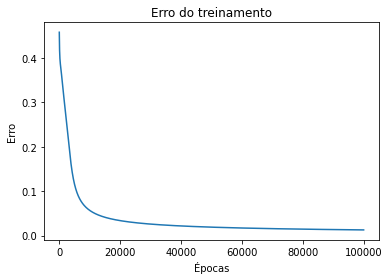

In [ ]:
rede.visualizaErro()

In [ ]:
rede.imprime()

Erro após 100000iterações: 0.01286870458863527
Percentual de acerto: 98.71312954113647%
Entrada [0 0], Classe: [0.00213903]	ou[0]
Entrada [0 1], Classe: [0.01527838]	ou[0]
Entrada [1 0], Classe: [0.01279167]	ou[0]
Entrada [1 1], Classe: [0.97873426]	ou[1]


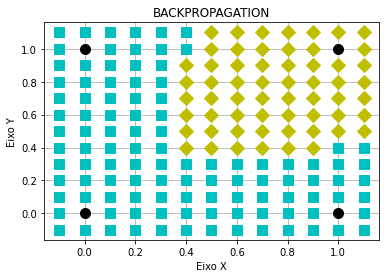

In [ ]:
rede.plota_grafico(entradas)

## **Porta Lógica OR:** Lineramente separável

In [ ]:
"""Declarando as respectivas saidas"""
saidas = np.array([[0],[1],[1],[1]])

rede = Backprop(entradas, saidas)
rede.inicializaPesos()
rede.treinamento()

Arquitetura da rede:
Entrada:  2 , Camada escondida:  3 , Saida:  1


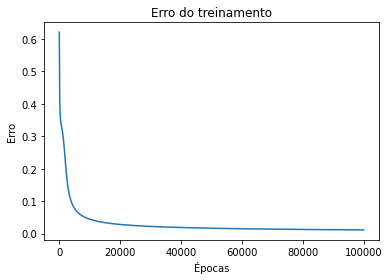

In [ ]:
rede.visualizaErro()

In [ ]:
rede.imprime()

Erro após 100000iterações: 0.01143755995488898
Percentual de acerto: 98.85624400451111%
Entrada [0 0], Classe: [0.01861008]	ou[0]
Entrada [0 1], Classe: [0.98872449]	ou[1]
Entrada [1 0], Classe: [0.98871177]	ou[1]
Entrada [1 1], Classe: [0.99542358]	ou[1]


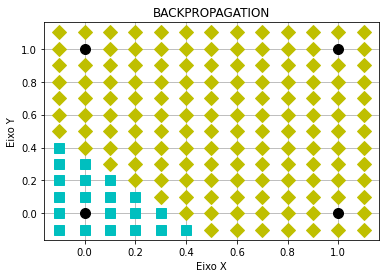

In [ ]:
rede.plota_grafico(entradas)

## **Porta Lógica XOR:** Não-Linearmente separável

In [ ]:
"""Declarando as respectivas saidas"""
saidas = np.array([[0],[1],[1],[0]])

rede = Backprop(entradas, saidas)
rede.inicializaPesos()
rede.treinamento()

Arquitetura da rede:
Entrada:  2 , Camada escondida:  3 , Saida:  1


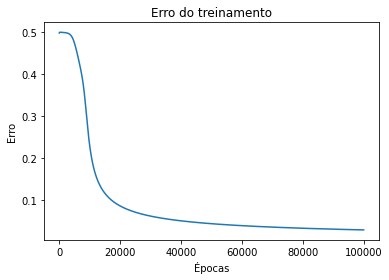

In [ ]:
rede.visualizaErro()

In [ ]:
rede.imprime()

Erro após 100000iterações: 0.028740125328095056
Percentual de acerto: 97.1259874671905%
Entrada [0 0], Classe: [0.04641137]	ou[0]
Entrada [0 1], Classe: [0.97136306]	ou[1]
Entrada [1 0], Classe: [0.9713618]	ou[1]
Entrada [1 1], Classe: [0.011274]	ou[0]


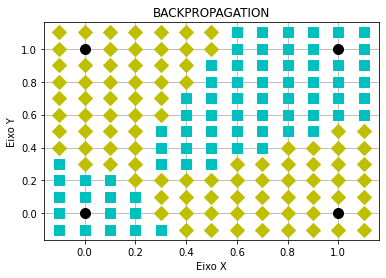

In [ ]:
rede.plota_grafico(entradas)

**Créditos:** Sherlon Almeida, Gustavo Montrini e Márcus Vinícius